In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Step 2: Read the dataset and perform data preprocessing
data = pd.read_csv('sales_data_sample.csv',encoding='ISO-8859-1')


In [8]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
X = data[['QUANTITYORDERED', 'PRICEEACH']].values

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

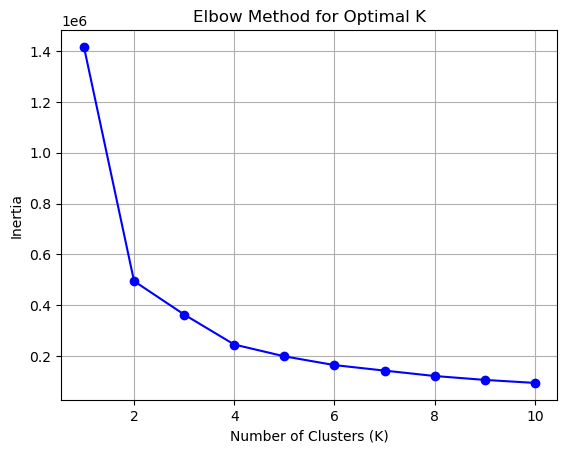

In [11]:

plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
optimal_k = 3  # You can visually identify the elbow point from the plot

# Step 6: Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# Display the results
print(data.head())

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

In [12]:
cluster_0 = data[data['Cluster'] == 0]
cluster_1 = data[data['Cluster'] == 1]
cluster_2 = data[data['Cluster'] == 2]

# You can then print or explore the data points within each cluster
print("Data points in Cluster 0:")
print(cluster_0)

print("Data points in Cluster 1:")
print(cluster_1)

print("Data points in Cluster 2:")
print(cluster_2)

Data points in Cluster 0:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
2           10134               41      94.74                2  3884.34   
4           10159               49     100.00               14  5205.27   
5           10168               36      96.66                1  3479.76   
6           10180               29      86.13                9  2497.77   
...           ...              ...        ...              ...      ...   
2816        10327               37      86.74                4  3209.38   
2817        10337               42      97.16                5  4080.72   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLI